In [103]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import fbprophet as fbp
from fbprophet.plot import plot_plotly

import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error, mean_squared_error

import plotly.offline as py
py.init_notebook_mode()

In [104]:
dataset = pd.read_csv('./time-series/data/network-analytics-smmothed-cut.csv',)
dataset.tail()

Timestamp  utilization
2061  2018-01-04 04:00:00    46.874583
2062  2018-01-04 05:00:00    45.047358
2063  2018-01-04 06:00:00    61.071217
2064  2018-01-04 07:00:00    51.078433
2065  2018-01-04 08:00:00    47.746292

In [105]:
dataset.rename(
    columns={
        'Timestamp': 'ds',
        'utilization': 'y'
    },
    inplace=True
)

dataset.reset_index(
    drop=True,
    inplace=True
)

dataset['ds'] = pd.to_datetime(dataset['ds'])
dataset.head()

ds          y
0 2017-10-10 07:00:00  90.397000
1 2017-10-10 08:00:00  74.493000
2 2017-10-10 09:00:00  68.930125
3 2017-10-10 10:00:00  52.874208
4 2017-10-10 11:00:00  58.498275

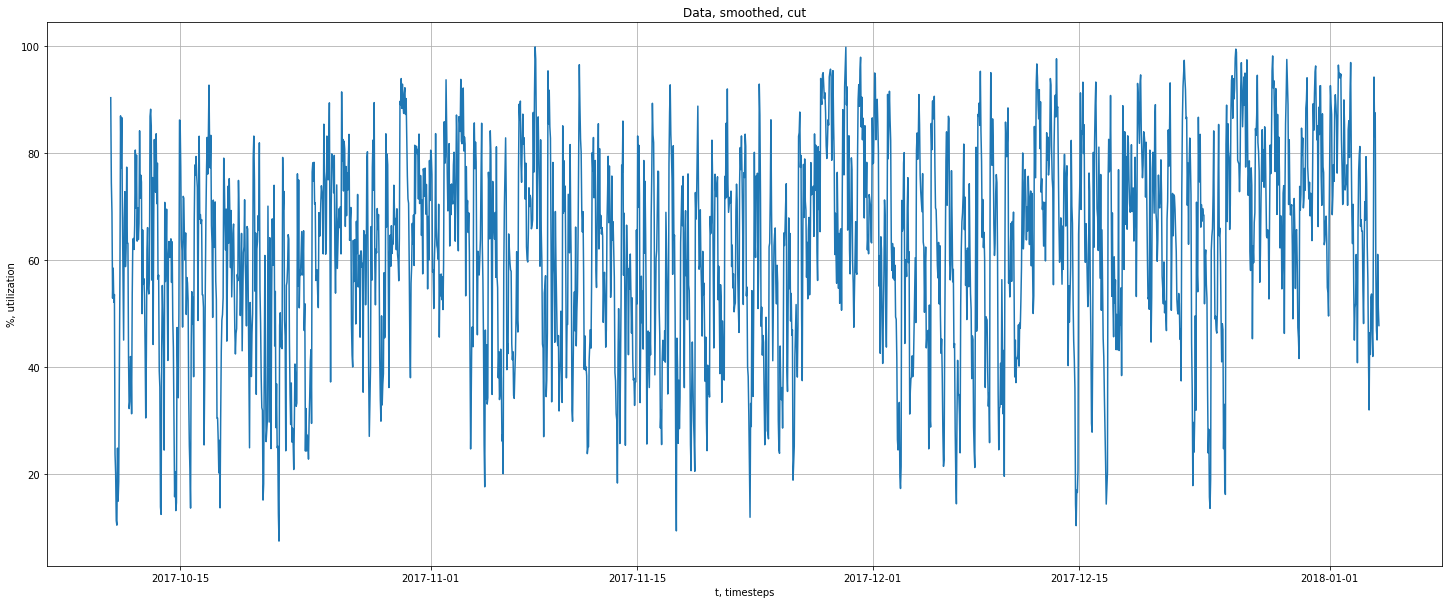

In [106]:
plt.figure(figsize=(25, 10))
plt.plot(dataset.ds, dataset.y)
plt.grid('on')
plt.xlabel('t, timesteps')
plt.ylabel('%, utilization')
plt.title('Data, smoothed, cut')
plt.show()

In [107]:
model = fbp.Prophet()

In [108]:
model.fit(dataset)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [109]:
def make_future_data_frame(df, n_hours):
    result = pd.DataFrame()
    result['ds'] = df['ds']
    last_datetime = df.tail(1)['ds']
    for i in range(n_hours):
        next_datetime = last_datetime + np.timedelta64(i + 1, 'h')
        new_row = pd.DataFrame()
        new_row['ds'] = next_datetime
        result = result.append(new_row)
    return result

In [130]:
#future = model.make_future_dataframe(
#    periods=30
#)
HOURS_TO_PREDICT = 27 * 7
future = make_future_data_frame(dataset, HOURS_TO_PREDICT)
future.tail()

ds
2065 2018-01-12 01:00:00
2065 2018-01-12 02:00:00
2065 2018-01-12 03:00:00
2065 2018-01-12 04:00:00
2065 2018-01-12 05:00:00

In [111]:
forecast = model.predict(
    df=future
)

In [112]:
forecast.head(10).T

0                    1  \
ds                          2017-10-10 07:00:00  2017-10-10 08:00:00   
trend                                   54.0339              54.0492   
yhat_lower                              49.8261              50.6152   
yhat_upper                              87.4178              85.9809   
trend_lower                             54.0339              54.0492   
trend_upper                             54.0339              54.0492   
additive_terms                          14.3265              14.3622   
additive_terms_lower                    14.3265              14.3622   
additive_terms_upper                    14.3265              14.3622   
daily                                   7.88997              8.04909   
daily_lower                             7.88997              8.04909   
daily_upper                             7.88997              8.04909   
weekly                                  6.43654              6.31308   
weekly_lower                            6.43654              6.31308   
weekly_upper                            6.43654              6.31308   
multiplicative_terms                          0                    0   
multiplicative_terms_lower                    0                    0   
multiplicative_terms_upper                    0                    0   
yhat                                    68.3604              68.4113   

                                              2                    3  \
ds                          2017-10-10 09:00:00  2017-10-10 10:00:00   
trend                                   54.0644              54.0797   
yhat_lower                              49.1131              46.2688   
yhat_upper                              86.4925              83.8418   
trend_lower                             54.0644              54.0797   
trend_upper                             54.0644              54.0797   
additive_terms                          12.8467              10.9905   
additive_terms_lower                    12.8467              10.9905   
additive_terms_upper                    12.8467              10.9905   
daily                                   6.67396              4.97382   
daily_lower                             6.67396              4.97382   
daily_upper                             6.67396              4.97382   
weekly                                   6.1727              6.01666   
weekly_lower                             6.1727              6.01666   
weekly_upper                             6.1727              6.01666   
multiplicative_terms                          0                    0   
multiplicative_terms_lower                    0                    0   
multiplicative_terms_upper                    0                    0   
yhat                                    66.9111              65.0701   

                                              4                    5  \
ds                          2017-10-10 11:00:00  2017-10-10 12:00:00   
trend                                   54.0949              54.1102   
yhat_lower                              45.2611              43.8566   
yhat_upper                              80.6202              78.3253   
trend_lower                             54.0949              54.1102   
trend_upper                             54.0949              54.1102   
additive_terms                          9.17438              6.40716   
additive_terms_lower                    9.17438              6.40716   
additive_terms_upper                    9.17438              6.40716   
daily                                   3.32811             0.744233   
daily_lower                             3.32811             0.744233   
daily_upper                             3.32811             0.744233   
weekly                                  5.84627              5.66293   
weekly_lower                            5.84627              5.66293   
weekly_upper                            5.84627              5.66293   
multiplicati

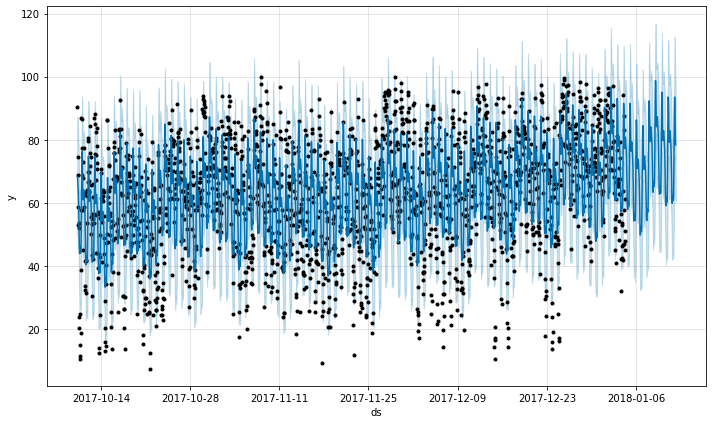

In [113]:
fig = model.plot(
    fcst=forecast
)

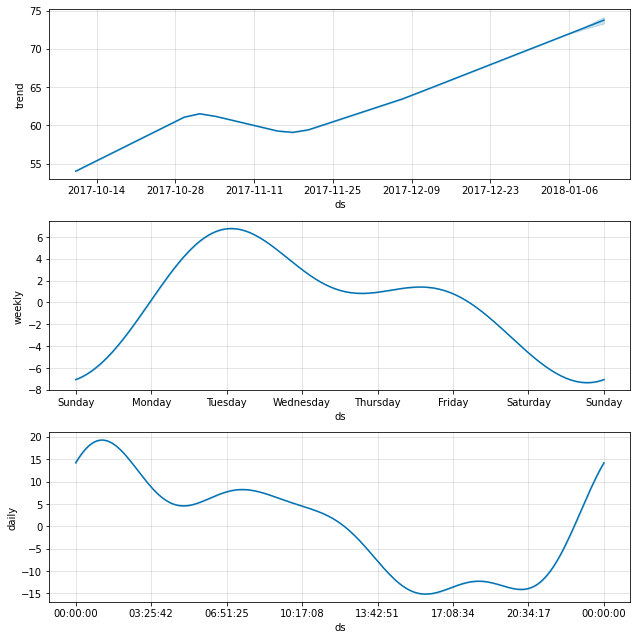

In [114]:
fig = model.plot_components(
    fcst=forecast
)

In [115]:
fig = plot_plotly(model, forecast)
py.iplot(fig)

In [119]:
dataset.tail(1)['ds']

2065   2018-01-04 08:00:00
Name: ds, dtype: datetime64[ns]

In [117]:
y_true = dataset['y'].to_numpy()
y_pred = forecast[forecast['ds'] <= '2018-01-04 08:00:00']['yhat'].to_numpy()

In [122]:
mean_absolute_error(
    y_true = y_true,
    y_pred = y_pred
)

11.301579150874101

In [123]:
dataset_log = dataset.copy()
dataset_log['y'] = np.log1p(dataset_log['y'])

In [124]:
model = fbp.Prophet()
model.fit(
    df=dataset_log
)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [125]:
future = make_future_data_frame(dataset_log, HOURS_TO_PREDICT)

In [126]:
forecast = model.predict(
    df=future
)

In [127]:
fig = plot_plotly(model, forecast)
py.iplot(fig)

In [128]:
y_true = np.expm1(dataset_log['y'].to_numpy())
y_pred = np.expm1(forecast[forecast['ds'] <= '2018-01-04 08:00:00']['yhat'].to_numpy())

In [129]:
mean_absolute_error(
    y_true = y_true,
    y_pred = y_pred
)

11.64580549388298